<a href="https://colab.research.google.com/github/kimsuyeon0/studyml/blob/master/basic/tensorflow/tensorflow_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear regression

## Hypothesis (가설)

우리가 가진 데이터가 선형일 것이라고 가설을 세울 수 있다.
실제 데이터들은 linear한 경우가 굉장히 많다.

어떤 데이터가 있다면 그 데이터에 맞는 linear한 선을 찾을 수 있을 것이다.

선을 찾는 것은 곧 학습을 하는 것이다.

H(x)=Wx+b

많은 가설 중 어떤 가설이 더 좋다고 할 수 있는가?

-> cost function(loss function)을 찾는다.

(H(x)-y)^2

-> cost function을 가장 작게하는 가설이 좋은 가설이다.




## 텐서플로우 기본

1) 그래프 빌드

2) 세션런

3) 그래프 값 업데이트/리턴


Variable ?

-> 텐서플로우가 변형하는 값.
학습하는 과정에서 텐서플로우가 변형시킨다.

In [0]:
import tensorflow as tf

In [0]:
# 그래프 빌드

x_train=[1,2,3]
y_train=[1,2,3]

W=tf.Variable(tf.random_normal([1]), name='weight')
b=tf.Variable(tf.random_normal([1]), name='bias')

hypothesis = x_train * W + b

cost=tf.reduce_mean(tf.square(hypothesis-y_train))

In [0]:
# cost minimize하기 W,b를 조절해서 값을 찾는다.

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train=optimizer.minimize(cost)

In [5]:
# 세션런

sess=tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(2001):
  sess.run(train)
  if step % 20 ==0:
    print(step, sess.run(cost), sess.run(W), sess.run(b))

0 0.40628424 [1.5332663] [-1.5320455]
20 0.2862939 [1.6093144] [-1.4155667]
40 0.259267 [1.5903065] [-1.3448052]
60 0.23546362 [1.563481] [-1.2812011]
80 0.21385169 [1.5370868] [-1.220951]
100 0.19422348 [1.511854] [-1.1635668]
120 0.17639695 [1.4877995] [-1.1088834]
140 0.16020657 [1.4648749] [-1.0567698]
160 0.1455021 [1.4430274] [-1.0071056]
180 0.13214734 [1.4222068] [-0.95977527]
200 0.12001825 [1.4023645] [-0.9146692]
220 0.10900254 [1.383455] [-0.8716832]
240 0.09899789 [1.3654338] [-0.8307172]
260 0.08991143 [1.3482598] [-0.7916766]
280 0.081659 [1.331893] [-0.7544707]
300 0.07416399 [1.3162951] [-0.71901315]
320 0.06735693 [1.3014303] [-0.68522215]
340 0.06117459 [1.2872642] [-0.65301913]
360 0.055559766 [1.2737639] [-0.62232965]
380 0.050460283 [1.260898] [-0.59308255]
400 0.04582883 [1.2486368] [-0.56520975]
420 0.041622452 [1.2369517] [-0.53864694]
440 0.037802197 [1.2258158] [-0.5133326]
460 0.034332536 [1.2152033] [-0.48920768]
480 0.03118133 [1.2050894] [-0.4662167]
500 

In [6]:
# placeholder로 선형회귀 실행시키기
X=tf.placeholder(tf.float32)
Y=tf.placeholder(tf.float32)

for step in range(2001):
  cost_val, W_val, b_val, _= \
  sess.run([cost, W, b, train], feed_dict={X:[1,2,3], Y:[1,2,3]})
  if step % 20 ==0:
    print(step, cost_val, W_val, b_val)

0 2.0713944e-05 [1.0052733] [-0.01198744]
20 1.8812403e-05 [1.0050254] [-0.01142409]
40 1.7086519e-05 [1.0047894] [-0.01088718]
60 1.5517862e-05 [1.0045643] [-0.01037555]
80 1.4093604e-05 [1.0043497] [-0.00988794]
100 1.2800329e-05 [1.0041454] [-0.00942329]
120 1.1625215e-05 [1.0039506] [-0.00898047]
140 1.0558392e-05 [1.003765] [-0.00855844]
160 9.589422e-06 [1.0035878] [-0.00815624]
180 8.709231e-06 [1.0034194] [-0.00777292]
200 7.910045e-06 [1.0032587] [-0.00740769]
220 7.1841146e-06 [1.0031055] [-0.00705957]
240 6.5243566e-06 [1.0029596] [-0.00672782]
260 5.9259164e-06 [1.0028205] [-0.00641162]
280 5.3819276e-06 [1.0026879] [-0.00611029]
300 4.887827e-06 [1.0025616] [-0.00582312]
320 4.4393946e-06 [1.0024413] [-0.00554948]
340 4.0319755e-06 [1.0023266] [-0.00528871]
360 3.662064e-06 [1.0022173] [-0.00504022]
380 3.3259537e-06 [1.0021131] [-0.00480343]
400 3.0207482e-06 [1.0020138] [-0.00457777]
420 2.7436402e-06 [1.0019193] [-0.00436267]
440 2.491943e-06 [1.0018291] [-0.0041577]
46

In [7]:
# 전체과정

W=tf.Variable(tf.random_normal([1]), name='weight')
b=tf.Variable(tf.random_normal([1]), name='bias')
X=tf.placeholder(tf.float32, shape=[None])
Y=tf.placeholder(tf.float32, shape=[None])

hypothesis= X * W +b
cost=tf.reduce_mean(tf.square(hypothesis -Y))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

sess=tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(2001):
  cost_val, W_val, b_val, _= \
  sess.run([cost, W, b, train], feed_dict={X:[1,2,3,4,5], Y:[2.1,3.1,4.1,5.1,6.1]})
  if step % 20 ==0:
    print(step, cost_val, W_val, b_val)

0 13.220677 [0.11556825] [1.273122]
20 0.02439968 [0.89598066] [1.4619023]
40 0.021073414 [0.9060562] [1.4391052]
60 0.01840355 [0.9122234] [1.4169009]
80 0.01607195 [0.91797215] [1.3961465]
100 0.014035796 [0.92334414] [1.376752]
120 0.012257543 [0.92836434] [1.3586273]
140 0.010704617 [0.93305576] [1.3416896]
160 0.00934844 [0.93744] [1.3258615]
180 0.00816406 [0.9415371] [1.3110695]
200 0.007129731 [0.9453659] [1.2972463]
220 0.006226464 [0.9489439] [1.2843287]
240 0.0054376004 [0.9522876] [1.2722567]
260 0.0047486955 [0.9554124] [1.2609754]
280 0.0041470714 [0.9583325] [1.2504328]
300 0.0036216837 [0.96106124] [1.240581]
320 0.0031628371 [0.96361136] [1.2313743]
340 0.0027621272 [0.9659945] [1.2227706]
360 0.0024121962 [0.9682215] [1.2147304]
380 0.0021065914 [0.97030264] [1.2072167]
400 0.0018396877 [0.97224766] [1.2001947]
420 0.0016066156 [0.9740651] [1.1936327]
440 0.0014030596 [0.97576374] [1.1875005]
460 0.001225303 [0.97735107] [1.1817697]
480 0.0010700676 [0.97883433] [1.17

In [8]:
# test

print(sess.run(hypothesis, feed_dict={X:[5]}))
print(sess.run(hypothesis, feed_dict={X:[2.5]}))
print(sess.run(hypothesis, feed_dict={X:[1.5,3.5]}))

[6.0998282]
[3.6001363]
[2.6002598 4.6000133]


## Cost Function 최소화 하기

W=1, cost(W)=0

W=0, cost(W)=4.67

W=2, cost(W)=4.67

cost가 최소화 되는 점을 찾아야 함.

-> Gradient descent algorithm 이용

#### Gradient descent algorithm

1) 어떤 점에서 시작

2) W를 조금씩 바꾸면서 cost를 최소화 하는 점을 찾는다.

3) 경사도를 계산하면서 반복한다.

-> 어떤 점에서 시작하든지 cost 최소화하는 점을 찾을 수 있다.

#### 경사도 계산
미분으로 해결(미분은 자신이 계산할 필요 x, 컴퓨터가 알아서 계산해줄거임 ><)

#### Convex function (볼록함수)
cost function을 설계할 때는 반드시 convex function을 확인해야 한다. 

그렇게 해야만 gradient descent algorithom 을 적용할 수 있다.


In [0]:
import matplotlib.pyplot as plt

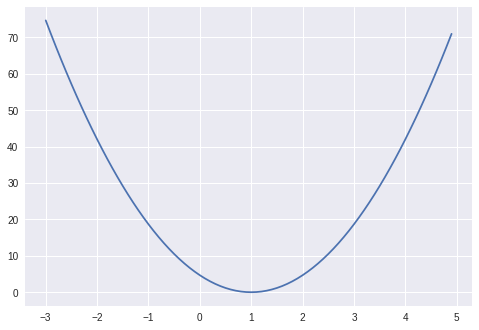

In [10]:
X=[1,2,3]
Y=[1,2,3]

W=tf.placeholder(tf.float32)

hypothesis= X*W

cost=tf.reduce_mean(tf.square(hypothesis-Y))

sess=tf.Session()

sess.run(tf.global_variables_initializer()) #variables 초기화

W_val=[]
cost_val=[]
for i in range(-30,50):#-3에서 5까지. 0.1간격으로.
  feed_W=i*0.1
  curr_cost, curr_W=sess.run([cost,W], feed_dict={W:feed_W})
  W_val.append(curr_W)
  cost_val.append(curr_cost)
  
plt.plot(W_val,cost_val) #x축, y축
plt.show()

In [25]:
#전체과정

x_data=[1,2,3]
y_data=[1,2,3]

W=tf.Variable(tf.random_normal([1]), name='weight')
X=tf.placeholder(tf.float32)
Y=tf.placeholder(tf.float32)

hypothesis=X*W

cost=tf.reduce_sum(tf.square(hypothesis-Y))

learning_rate=0.1 
gradient=tf.reduce_mean((W*X-Y)*X)
descent=W-learning_rate*gradient
update=W.assign(descent) # W업데이트

sess=tf.Session()

sess.run(tf.global_variables_initializer())

for step in range(21):
    sess.run(update, feed_dict={X: x_data, Y: y_data}) # 업데이트 실행.
    print(step, sess.run(cost, feed_dict={X: x_data, Y: y_data}), sess.run(W))

0 23.30275 [-0.29014814]
1 6.628339 [0.31192094]
2 1.8853947 [0.63302445]
3 0.53629035 [0.8042797]
4 0.15254481 [0.8956158]
5 0.043390498 [0.9443284]
6 0.012342217 [0.9703085]
7 0.0035106612 [0.98416454]
8 0.000998588 [0.99155444]
9 0.0002840482 [0.9954957]
10 8.079501e-05 [0.9975977]
11 2.2980235e-05 [0.9987188]
12 6.5367303e-06 [0.9993167]
13 1.8595163e-06 [0.9996356]
14 5.2898935e-07 [0.9998056]
15 1.5037664e-07 [0.99989635]
16 4.2833562e-08 [0.9999447]
17 1.2176503e-08 [0.9999705]
18 3.466539e-09 [0.99998426]
19 9.918502e-10 [0.9999916]
20 2.7818103e-10 [0.9999955]


In [27]:
#전체과정 (optimizer 사용)
X=[1,2,3]
Y=[1,2,3]

W=tf.Variable(5.0)

hypothesis=X*W

cost=tf.reduce_mean(tf.square(hypothesis-Y))

optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.1)
train=optimizer.minimize(cost)

sess=tf.Session()

sess.run(tf.global_variables_initializer())

for step in range(10):
  print(step, sess.run(W))
  sess.run(train)

0 5.0
1 1.2666664
2 1.0177778
3 1.0011852
4 1.000079
5 1.0000052
6 1.0000004
7 1.0
8 1.0
9 1.0


In [32]:
# gradient 임의로 수정하기

X=[1,2,3]
Y=[1,2,3]

W=tf.Variable(5.)

hypothesis=X*W

gradient=tf.reduce_mean((W*X-Y)*X)*2

cost=tf.reduce_mean(tf.square(hypothesis-Y))
optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.1)

gvs = optimizer.compute_gradients(cost, [W])

apply_gradients=optimizer.apply_gradients(gvs) #값을 수정하지 않았기 때문에 똑같이 나올것이다.

sess=tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(100):
  print(step, sess.run([gradient, W, gvs]))
  sess.run(apply_gradients)

0 [37.333332, 5.0, [(37.333336, 5.0)]]
1 [2.4888866, 1.2666664, [(2.4888866, 1.2666664)]]
2 [0.1659259, 1.0177778, [(0.1659259, 1.0177778)]]
3 [0.011061668, 1.0011852, [(0.011061668, 1.0011852)]]
4 [0.00073742867, 1.000079, [(0.00073742867, 1.000079)]]
5 [4.895528e-05, 1.0000052, [(4.8955284e-05, 1.0000052)]]
6 [3.0994415e-06, 1.0000004, [(3.0994415e-06, 1.0000004)]]
7 [0.0, 1.0, [(0.0, 1.0)]]
8 [0.0, 1.0, [(0.0, 1.0)]]
9 [0.0, 1.0, [(0.0, 1.0)]]
10 [0.0, 1.0, [(0.0, 1.0)]]
11 [0.0, 1.0, [(0.0, 1.0)]]
12 [0.0, 1.0, [(0.0, 1.0)]]
13 [0.0, 1.0, [(0.0, 1.0)]]
14 [0.0, 1.0, [(0.0, 1.0)]]
15 [0.0, 1.0, [(0.0, 1.0)]]
16 [0.0, 1.0, [(0.0, 1.0)]]
17 [0.0, 1.0, [(0.0, 1.0)]]
18 [0.0, 1.0, [(0.0, 1.0)]]
19 [0.0, 1.0, [(0.0, 1.0)]]
20 [0.0, 1.0, [(0.0, 1.0)]]
21 [0.0, 1.0, [(0.0, 1.0)]]
22 [0.0, 1.0, [(0.0, 1.0)]]
23 [0.0, 1.0, [(0.0, 1.0)]]
24 [0.0, 1.0, [(0.0, 1.0)]]
25 [0.0, 1.0, [(0.0, 1.0)]]
26 [0.0, 1.0, [(0.0, 1.0)]]
27 [0.0, 1.0, [(0.0, 1.0)]]
28 [0.0, 1.0, [(0.0, 1.0)]]
29 [0.0, 1.0, [(0

#### 수식정리

Hypothesis

Cost function

Gradient descent algorithm

## Multi Variables

매트릭스를 이용한다. (Dot Product)

H(X)=XW

w의 크기를 결정하는 방법 : 입력과 출력을 확인


In [35]:
x1_data = [73., 93., 89., 96., 73.]
x2_data = [80., 88., 91., 98., 66.]
x3_data = [75., 93., 90., 100., 70.]

y_data = [152., 185., 180., 196., 142.]

x1=tf.placeholder(tf.float32)
x2=tf.placeholder(tf.float32)
x3=tf.placeholder(tf.float32)

Y=tf.placeholder(tf.float32)

w1=tf.Variable(tf.random_normal([1]), name='weight1')
w2=tf.Variable(tf.random_normal([1]), name='weight2')
w3=tf.Variable(tf.random_normal([1]), name='weight3')
b=tf.Variable(tf.random_normal([1]), name='bias')

hypothesis=x1*w1*w2+x3*w3+b

cost=tf.reduce_mean(tf.square(hypothesis-Y))

optimizer=tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train= optimizer.minimize(cost)

sess=tf.Session()

sess.run(tf.global_variables_initializer())
for step in range(2001):
  cost_val, hy_val, _=sess.run([cost, hypothesis, train], feed_dict={x1: x1_data, x2: x2_data, x3: x3_data, Y: y_data})
  if step % 10 ==0:
    print(step, "Cost:", cost_val, "\nPrediction:\n", hy_val)
    


0 Cost: 62578.926 
Prediction:
 [-67.015724 -84.534805 -81.27236  -88.89255  -65.004234]
10 Cost: 4.997721 
Prediction:
 [147.76006 186.116   178.9014  195.14165 143.95508]
20 Cost: 4.6581435 
Prediction:
 [148.25864 186.74521 179.50589 195.8005  144.44197]
30 Cost: 4.6551437 
Prediction:
 [148.25943 186.74503 179.5062  195.8022  144.44044]
40 Cost: 4.6521273 
Prediction:
 [148.26    186.74454 179.50618 195.80356 144.43867]
50 Cost: 4.649114 
Prediction:
 [148.26054 186.74405 179.5062  195.80492 144.43689]
60 Cost: 4.6461325 
Prediction:
 [148.2611  186.74358 179.5062  195.80627 144.43512]
70 Cost: 4.643138 
Prediction:
 [148.26164 186.74309 179.50621 195.80765 144.43335]
80 Cost: 4.640151 
Prediction:
 [148.2622  186.74261 179.50621 195.80902 144.4316 ]
90 Cost: 4.6371837 
Prediction:
 [148.26276 186.74216 179.50623 195.81038 144.42982]
100 Cost: 4.634181 
Prediction:
 [148.26332 186.74167 179.50621 195.81172 144.42805]
110 Cost: 4.631234 
Prediction:
 [148.26385 186.74118 179.50623 1

In [37]:
x_data = [[73., 80., 75.],[93., 88., 93.],[89., 91., 90.],[96., 98., 100.],[73., 66., 70.]]
y_data = [[152.],[185.],[180.],[196.],[142.]]

X=tf.placeholder(tf.float32, shape=[None,3])
Y=tf.placeholder(tf.float32, shape=[None,1])

W=tf.Variable(tf.random_normal([3,1]), name="weight")
b=tf.Variable(tf.random_normal([1]), name="bias")

hypothesis=tf.matmul(X,W)+b

cost=tf.reduce_mean(tf.square(hypothesis-Y))

optimizer=tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train=optimizer.minimize(cost)

sess=tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(2001):
  cost_val, hy_val, _ = sess.run([cost,hypothesis, train], feed_dict={X:x_data, Y:y_data})
  if step %10 ==0:
    print(step, "Cost:", cost_val, "\nPrediction:\n", hy_val)

0 Cost: 106610.914 
Prediction:
 [[-136.63092]
 [-164.83026]
 [-162.15204]
 [-175.55727]
 [-126.78017]]
10 Cost: 4.778807 
Prediction:
 [[152.19666]
 [182.33084]
 [179.9056 ]
 [196.93515]
 [138.0191 ]]
20 Cost: 3.7875485 
Prediction:
 [[153.0643 ]
 [183.38553]
 [180.93867]
 [198.06038]
 [138.82632]]
30 Cost: 3.7722251 
Prediction:
 [[153.0607 ]
 [183.39305]
 [180.93994]
 [198.062  ]
 [138.83481]]
40 Cost: 3.7570388 
Prediction:
 [[153.05449]
 [183.39738]
 [180.93811]
 [198.06024]
 [138.84085]]
50 Cost: 3.7419236 
Prediction:
 [[153.04828]
 [183.40167]
 [180.93625]
 [198.05846]
 [138.84686]]
60 Cost: 3.7268791 
Prediction:
 [[153.04208]
 [183.40596]
 [180.93442]
 [198.05669]
 [138.85287]]
70 Cost: 3.7119155 
Prediction:
 [[153.03592]
 [183.41023]
 [180.93259]
 [198.05492]
 [138.85887]]
80 Cost: 3.6970317 
Prediction:
 [[153.02977]
 [183.41452]
 [180.93077]
 [198.05315]
 [138.86484]]
90 Cost: 3.6822305 
Prediction:
 [[153.02362]
 [183.41876]
 [180.92894]
 [198.05138]
 [138.87079]]
100 Co

## Queue Runners 

파일이 너무커서 한번에 메모리에 올릴 수 없을 경우
큐를 이용

#### 전체 플로우

1. 읽어올 파일 리스트 만들기

2. 읽어올 리더를 정의한다.

3. 읽어온 value 파싱 후에 필드타입 정의

In [46]:
filename_queue=tf.train.string_input_producer(['data1.csv'], shuffle=False, name='filename_queue')

reader=tf.TextLineReader()
key, value = reader.read(filename_queue)

record_defaults=[[0.],[0.],[0.],[0.]] #필드 데이터 타입 정의
xy=tf.decode_csv(value, record_defaults=record_defaults)#csv로 디코더 

train_x_batch, train_y_batch=tf.train.batch([xy[0:-1], xy[-1:]], batch_size=10)  #한번에 10개씩 가져오기

X = tf.placeholder(tf.float32, shape=[None, 3])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([3, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

hypothesis = tf.matmul(X, W) + b

cost = tf.reduce_mean(tf.square(hypothesis - Y))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)

sess= tf.Session()

sess.run(tf.global_variables_initializer())

coord = tf.train.Coordinator()
threads = tf.train.start_queue_runners(sess=sess, coord=coord)

for step in range(2001):
  x_batch, y_batch=sess.run([train_x_batch, train_y_batch])
  cost_val, hy_val,_=sess.run([cost, hypothesis, train], feed_dict={X:x_batch, Y:y_batch})
  if step % 10 ==0:
    print(step, "Cost:", cost_val, "\nPrediction:\n", hy_val)
    
coord.request_stop()
coord.join(threads)

0 Cost: 40326.46 
Prediction:
 [[-48.2852  ]
 [-51.572063]
 [-54.463398]
 [-55.942406]
 [-40.416355]
 [-23.65526 ]
 [-38.530807]
 [-24.123194]
 [-42.482426]
 [-31.191418]]
10 Cost: 20.730423 
Prediction:
 [[148.58026 ]
 [185.05116 ]
 [178.68076 ]
 [197.96753 ]
 [140.05109 ]
 [109.394424]
 [151.52455 ]
 [116.76487 ]
 [178.65881 ]
 [173.63617 ]]
20 Cost: 27.544886 
Prediction:
 [[149.92555]
 [186.63951]
 [180.26128]
 [199.67943]
 [141.26312]
 [110.27013]
 [152.79997]
 [117.70286]
 [180.12509]
 [174.97092]]
30 Cost: 27.41062 
Prediction:
 [[149.95135 ]
 [186.64182 ]
 [180.27911 ]
 [199.68944 ]
 [141.26552 ]
 [110.25398 ]
 [152.8015  ]
 [117.696495]
 [180.10907 ]
 [174.93266 ]]
40 Cost: 27.218592 
Prediction:
 [[149.96817]
 [186.63345]
 [180.28638]
 [199.68796]
 [141.25978]
 [110.23192]
 [152.79443]
 [117.6838 ]
 [180.08316]
 [174.88536]]
50 Cost: 27.027905 
Prediction:
 [[149.98486]
 [186.62508]
 [180.29353]
 [199.68642]
 [141.25401]
 [110.20993]
 [152.78737]
 [117.67112]
 [180.05731]
 [1